#### scp janbrauns@studienarbeit-tinf18b2-alter.it.dh-karlsruhe.de:/home/janbrauns/studienarbeit/model/v3.pth model/v3.pht

In [1]:
import torch
import torch.nn
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
# plt.rcParams["figure.figsize"] = (16, 5)

import sys  
sys.path.insert(0, '/Users/janbraunsdorff/studienarbeit/v3')

In [2]:
path_to_data = '/Users/janbraunsdorff/Studienarbeit-projekt/data'
path_to_validation_annotation = path_to_data + "/validation.csv"
path_to_training_annotation = path_to_data + "/training.csv"
path_to_validatoin_data = path_to_data + '/boneage-validation-dataset/'
path_to_training_data = path_to_data + '/boneage-training-dataset/'
path = path_to_data + '/pickel/v3'

In [3]:
def img_to_tensor(base_path):
    img = processImages(img_path=base_path)
    arr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    t_img = torch.tensor(arr)
    t_img_normalize = t_img.permute(2, 0, 1)

    return t_img_normalize

In [4]:
def processImages(img_path, size_target=256):
    img = cv2.imread(img_path)

    size_target = 450
    img = cv2.resize(img, (size_target, size_target), interpolation=cv2.INTER_LINEAR)

    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    x = y = (size_target - 299) // 2

    h = w = 299
    img = bgr[y:y + h, x:x + w]

    return img

In [5]:
def create_date_point(id, path, sex, age):
    point = (img_to_tensor(path + str(id) + ".png"), torch.Tensor([sex]), age)
    return point

In [6]:
model = torch.load('model/v3.pht', map_location=torch.device('cpu'))
model.eval()
print('**done**')

**done**


In [7]:
df_trainig = pd.read_csv(path_to_validation_annotation)
res = []
for index, row in df_trainig.iterrows():
    id = row[0]
    age = row[2]
    sex = float(1 if row[1] else 0)
    point = create_date_point(id, path_to_validatoin_data, sex, age)

    pred = model(point[0].unsqueeze(0), point[1])
    print('\r', index *100 / 1425,  id, age, pred.item(), sex, end='')
    res.append((id, pred.item(), age, sex))

 99.9298245614035 15612 132 129.4586944580078 1.0

In [8]:
res.sort(key=lambda x : abs(x[1]-x[2]))

In [9]:
with open('model/val_out_v3.csv', 'w') as filehandle:
    filehandle.write('%s\n' % 'id;pred;age;diff;sex')
    for listitem in res:
        val = str(listitem[0]) + ';' + str(listitem[1]) + ';' + str(listitem[2]) + ';' +str(abs(listitem[1]-listitem[2])) +';' + str(listitem[3])
        filehandle.write('%s\n' % val)

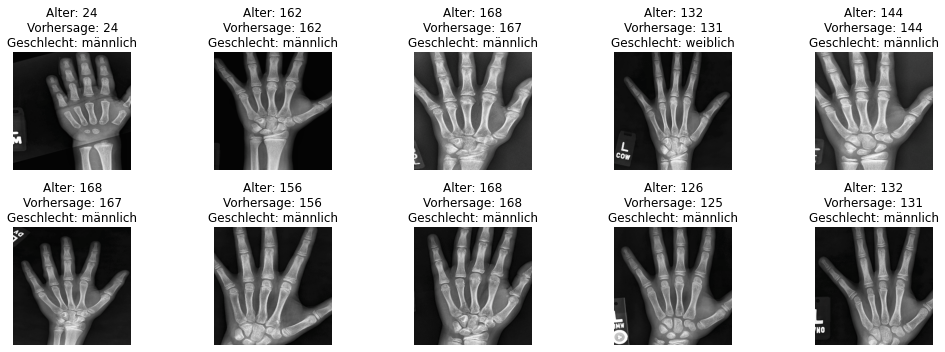

In [25]:
f = plt.figure()
i = 0
for (id, pred, age, sex) in  res[:10]:
    i += 1
    ax = f.add_subplot(2, 5, i)
    plt.imshow(img_to_tensor(path_to_validatoin_data + str(id) + ".png").permute(1,2,0))
    plt.title('Alter: ' + str(age) + '\nVorhersage: ' + str(int(pred)) + '\nGeschlecht: ' + ('männlich'if sex == 1 else 'weiblich'))
    plt.axis('off')
    plt.tight_layout()

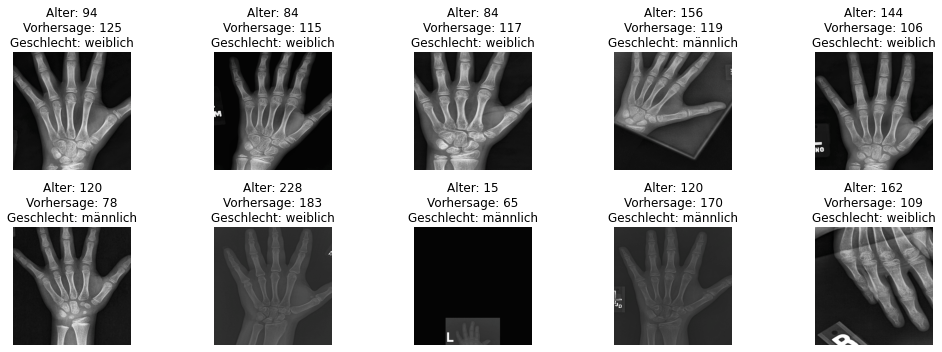

In [24]:
f = plt.figure()
i = 0
for (id, pred, age, sex) in  res[-10:]:
    i += 1
    ax = f.add_subplot(2, 5, i)
    plt.imshow(img_to_tensor(path_to_validatoin_data + str(id) + ".png").permute(1,2,0))
    plt.title('Alter: ' + str(age) + '\nVorhersage: ' + str(int(pred)) + '\nGeschlecht: ' + ('männlich'if sex == 1 else 'weiblich'))
    plt.axis('off')
    plt.tight_layout()

In [7]:
df_trainig = pd.read_csv(path_to_training_annotation)
res = []
for index, row in df_trainig.iterrows():
    id = row[0]
    age = row[1]
    sex = float(row[2] if 1 else 0)

    point = create_date_point(id, path_to_training_data, sex, age)
    pred = model(point[0].unsqueeze(0), point[1])
    print('\r', index *100 / 12611,  id, age, pred.item(), sex, end='')
    res.append((id, pred.item(), age, sex))

 99.9920704147173 15610 132 127.91675567626953 1.0

In [8]:
res.sort(key=lambda x : abs(x[1]-x[2]))

In [9]:
with open('model/train_out_v3.csv', 'w') as filehandle:
    filehandle.write('%s\n' % 'id;pred;age;diff;sex')
    for listitem in res:
        val = str(listitem[0]) + ';' + str(listitem[1]) + ';' + str(listitem[2]) + ';' +str(abs(listitem[1]-listitem[2])) +';' + str(listitem[3])
        filehandle.write('%s\n' % val)

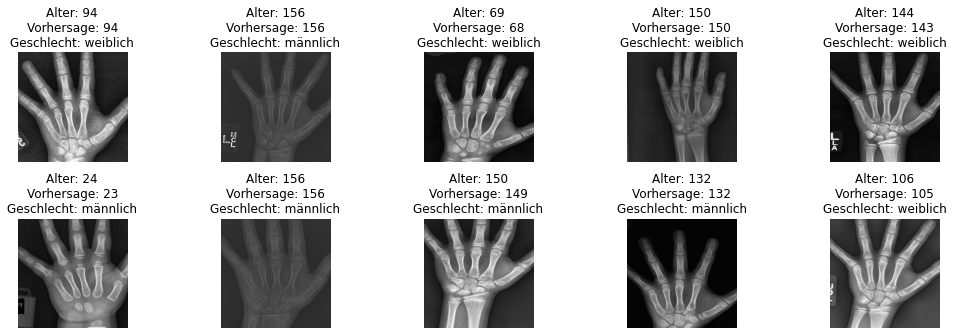

In [11]:
f = plt.figure()
i = 0
for (id, pred, age, sex) in  res[:10]:
    i += 1
    ax = f.add_subplot(2, 5, i)
    plt.imshow(img_to_tensor(path_to_training_data + str(id) + ".png").permute(1,2,0))
    plt.title('Alter: ' + str(age) + '\nVorhersage: ' + str(int(pred)) + '\nGeschlecht: ' + ('männlich'if sex == 1 else 'weiblich'))
    plt.tight_layout()
    plt.axis('off')

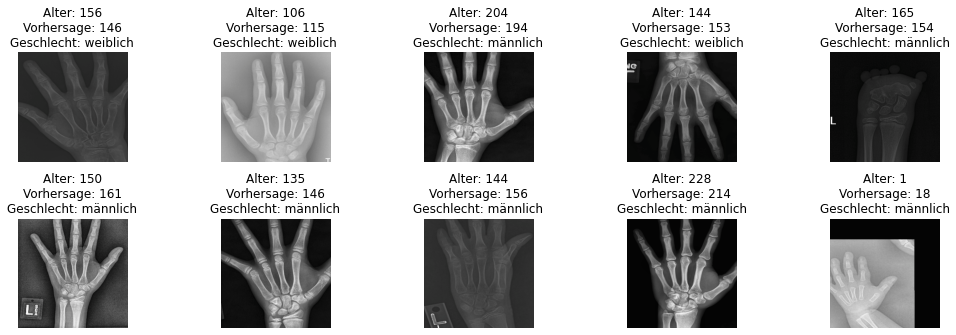

In [12]:
f = plt.figure()
i = 0
for (id, pred, age, sex) in  res[-10:]:
    i += 1
    ax = f.add_subplot(2, 5, i)
    plt.imshow(img_to_tensor(path_to_training_data + str(id) + ".png").permute(1,2,0))
    plt.title('Alter: ' + str(age) + '\nVorhersage: ' + str(int(pred)) + '\nGeschlecht: ' + ('männlich'if sex == 1 else 'weiblich'))
    plt.tight_layout()
    plt.axis('off')

In [ ]:
def sum_error(df):
    err = df.sum(axis=0)['diff']
    return err, err / len(df)

In [144]:
get_data('/Users/janbraunsdorff/studienarbeit/model/val_out_v3.csv')

(array([0.00356511, 0.01570182, 0.01138385, 0.01749215, 0.04567263,
        0.03344873, 0.04310373, 0.04763302, 0.04726418, 0.07203792,
        0.08749514, 0.13406479, 0.11863414, 0.13788403, 0.08127891,
        0.04060816, 0.01590477, 0.02533192, 0.01108764, 0.01040734]),
 array([0.10445337, 0.09200873, 0.03335326, 0.05124981, 0.0557563 ,
        0.0490003 , 0.03714369, 0.04104671, 0.04327443, 0.04908421,
        0.0523163 , 0.0417865 , 0.03778079, 0.02767007, 0.02645967,
        0.02766903, 0.031066  , 0.03226929, 0.0649708 , 0.10164073]),
 array([0.00461369, 0.0047079 , 0.0045208 , 0.02478418, 0.01971408,
        0.05802135, 0.0770525 , 0.14218967, 0.11677138, 0.00941226,
        0.13594424, 0.11359858, 0.07769228, 0.11243037, 0.02784766,
        0.02836564, 0.01153201, 0.01761745, 0.00473617, 0.0084478 ]),
 array([0.10708693, 0.01821229, 0.01499013, 0.03595365, 0.03268413,
        0.03543992, 0.03725924, 0.04459896, 0.04169764, 0.03641087,
        0.03669026, 0.02962588, 0.02504574

In [31]:
df_val_res = pd.read_csv('/Users/janbraunsdorff/studienarbeit/model/val_out_v3.csv', sep=';')
df_val_res.head()

,id,pred,age,diff,sex
0,11976,24.001688,24,0.001688,1.0
1,11511,162.004150,162,0.004150,1.0
2,8468,167.990097,168,0.009903,1.0
3,9708,131.979828,132,0.020172,0.0
4,10167,144.031586,144,0.031586,1.0


In [130]:
df_val_res_m = df_val_res.loc[df_val_res['sex'] == 1.0]
df_val_res_w = df_val_res.loc[df_val_res['sex'] == 0.0]

In [132]:
sum_error(df_val_res_m), sum_error(df_val_res_w)

((5339.622640609741, 6.907661889533947),
 (5209.024981498718, 7.989302118863065))

In [134]:
err_m = np.zeros(20)
cnt_m = np.zeros(20)

err_w = np.zeros(20)
cnt_w = np.zeros(20)

for row in df_val_res_m.iterrows():
    diff = row[1][3]
    age  = row[1][2]
    year = int(age // 12)

    
    err_m[year] = err_m[year] + diff
    cnt_m[year] = cnt_m[year] + 1

for row in df_val_res_w.iterrows():
    diff = row[1][3]
    age  = row[1][2]
    year = int(age // 12)

    
    err_w[year] = err_w[year] + diff
    cnt_w[year] = cnt_w[year] + 1

In [135]:
err_m_percent_abs = err_m / np.sum(err_m)
err_m_percent_rel = (err_m / cnt_m) / np.sum((err_m / cnt_m))

err_w_percent_abs = err_w / np.sum(err_w)
err_w_percent_rel = (err_w / cnt_w) / np.sum((err_w / cnt_w))

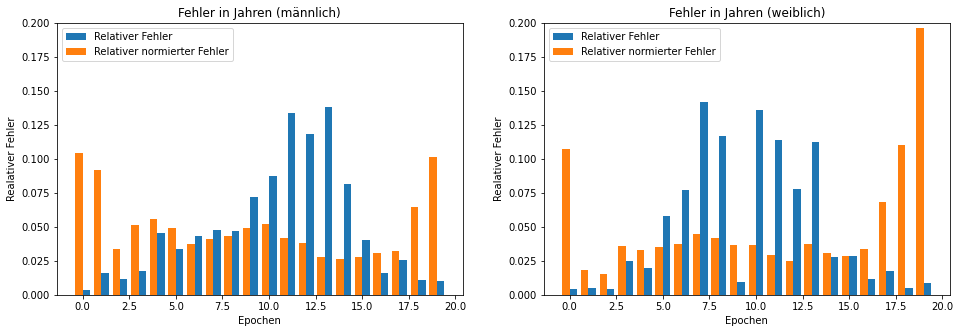

In [139]:
X = np.arange(20)


f = plt.figure()
ax = f.add_subplot(1,2,1)

ax.bar(X+0.2, err_m_percent_abs, width = 0.4)
ax.bar(X-0.2, err_m_percent_rel, width = 0.4)

plt.xlabel('Epochen')
plt.ylabel('Realativer Fehler')
plt.title('Fehler in Jahren (männlich)')
plt.legend(['Relativer Fehler', 'Relativer normierter Fehler'], loc='upper left')
ax.set_ylim(0, 0.2)


ax = f.add_subplot(1,2,2)

ax.bar(X+0.2, err_w_percent_abs, width = 0.4)
ax.bar(X-0.2, err_w_percent_rel, width = 0.4)

plt.xlabel('Epochen')
plt.ylabel('Realativer Fehler')
plt.title('Fehler in Jahren (weiblich)')
plt.legend(['Relativer Fehler', 'Relativer normierter Fehler'])
ax.set_ylim(0, 0.2)

plt.show()

In [156]:
def get_data(path):
    df = pd.read_csv(path, sep=';')

    df_m = df.loc[df['sex'] == 1.0]
    df_w = df.loc[df['sex'] == 0.0]

    err_m = np.zeros(20)
    cnt_m = np.zeros(20)

    err_w = np.zeros(20)
    cnt_w = np.zeros(20)

    for row in df_m.iterrows():
        diff = row[1][3]
        age  = row[1][2]
        year = int(age // 12)

        
        err_m[year] = err_m[year] + diff
        cnt_m[year] = cnt_m[year] + 1

    for row in df_w.iterrows():
        diff = row[1][3]
        age  = row[1][2]
        year = int(age // 12)

        
        err_w[year] = err_w[year] + diff
        cnt_w[year] = cnt_w[year] + 1

    cnt_m = [i if i > 0  else 1 for i in cnt_m]
    cnt_w = [i if i > 0  else 1 for i in cnt_w]

    err_m_percent_abs = err_m / np.sum(err_m)
    err_m_percent_rel = (err_m / cnt_m) / np.sum((err_m / cnt_m))

    err_w_percent_abs = err_w / np.sum(err_w)
    err_w_percent_rel = (err_w / cnt_w) / np.sum((err_w / cnt_w))

    return err_m_percent_abs, err_m_percent_rel, err_w_percent_abs, err_w_percent_rel

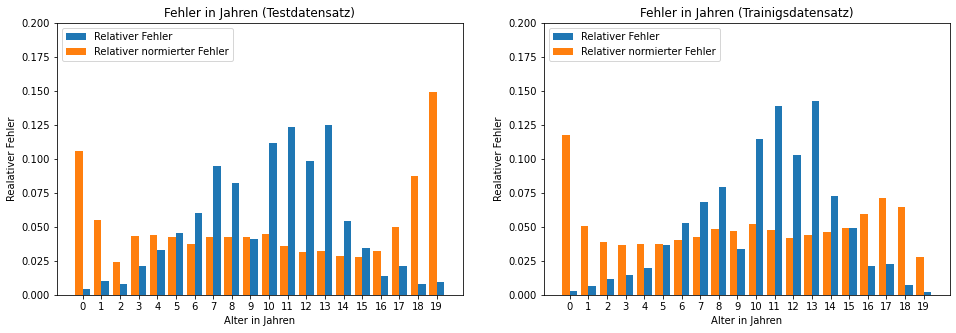

In [161]:
X = np.arange(20)


f = plt.figure()
a,b,c,d = get_data('/Users/janbraunsdorff/studienarbeit/model/val_out_v3.csv')

ax = f.add_subplot(1,2,1)
ax.bar(X+0.2, (a + c)/2.0 , width = 0.4)
ax.bar(X-0.2, (b + d)/2.0, width = 0.4)

plt.xlabel('Alter in Jahren')
plt.ylabel('Realativer Fehler')
plt.title('Fehler in Jahren (Testdatensatz)')
plt.legend(['Relativer Fehler', 'Relativer normierter Fehler'], loc='upper left')
plt.xticks(X)
ax.set_ylim(0, 0.2)


ax = f.add_subplot(1,2,2)
a,b,c,d = get_data('/Users/janbraunsdorff/studienarbeit/model/train_out_v3.csv')
ax.bar(X+0.2, (a + c)/2.0 , width = 0.4)
ax.bar(X-0.2, (b + d)/2.0, width = 0.4)
plt.xlabel('Alter in Jahren')
plt.ylabel('Realativer Fehler')
plt.title('Fehler in Jahren (Trainigsdatensatz)')
plt.legend(['Relativer Fehler', 'Relativer normierter Fehler'], loc='upper left')
plt.xticks(X)
ax.set_ylim(0, 0.2)

plt.show()

In [232]:
def print_filters(w, h, num_filter, tensor):
    fig = plt.figure(figsize=(w*h, w*h))
    images = [tensor[n].detach().numpy() for n in range(num_filter) ]

    grid = ImageGrid(fig, 111, nrows_ncols=(w, h),  axes_pad=0.1)
                    
    for ax, im in zip(grid, images):
        ax.imshow(im, cmap='gray')
    plt.show()



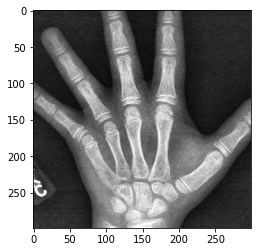

In [7]:
img = processImages(path_to_training_data + '9428.png')
plt.imshow(img, cmap='gray')
plt.show()

In [8]:
t_img = torch.tensor(img)
t_img = t_img.permute(2, 0, 1)
t_img = t_img.unsqueeze(0)
t_img = t_img.float()

t_img = model.inception_v3.Conv2d_1a_3x3(t_img)
t_img = model.inception_v3.Conv2d_2a_3x3(t_img)
t_img = model.inception_v3.Conv2d_2b_3x3(t_img)

t_img = model.inception_v3.maxpool1(t_img)

t_img = model.inception_v3.Conv2d_3b_1x1(t_img)
t_img = model.inception_v3.Conv2d_4a_3x3(t_img)

t_img = model.inception_v3.maxpool2(t_img)

In [9]:
t_img = model.inception_v3.Mixed_5b(t_img)

In [10]:
t_img = model.inception_v3.Mixed_5c(t_img)

In [11]:
t_img = model.inception_v3.Mixed_5d(t_img)

In [12]:
t_img = model.inception_v3.Mixed_6a(t_img)
t_img.shape

torch.Size([1, 768, 17, 17])

In [13]:
t_img = model.inception_v3.Mixed_6b(t_img)
t_img = model.inception_v3.Mixed_6c(t_img)
t_img = model.inception_v3.Mixed_6d(t_img)
t_img = model.inception_v3.Mixed_6e(t_img)

t_img = model.inception_v3.Mixed_7a(t_img)
t_img = model.inception_v3.Mixed_7b(t_img)
t_img = model.inception_v3.Mixed_7c(t_img)

t_img = model.inception_v3.avgpool(t_img)
t_img = model.inception_v3.dropout(t_img)


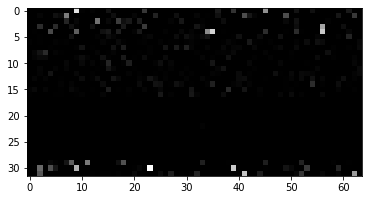

In [22]:
plt.imshow(t_img.permute(0, 2, 3, 1).reshape(1, 1, 32, 64)[0].permute(1,2,0).detach().numpy(), cmap='gray')